In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def min_value(x):
    min_x = np.zeros(len(x)-1)
    for ii, x_i in enumerate(x[:-1]):
        min_x[ii] = abs(x[ii+1] - x[ii])
    mx = np.min(min_x)
    return mx
# uniform dx selection

def interpolation(x,y):
    mx = min_value(x) 
    dx = mx/100
    x_final = np.array([])
    y_final = np.array([])
    for ii, x_i in enumerate(x[:-1]):
        x_new = np.arange(x[ii],x[ii+1],dx) # x에서 mx가 최소가 되는 값의 / 100 을해서  dx 가 일정하게 맞춤.
        if ii >= len(x) - 2 :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new))
        else :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new),endpoint=False)
        x_final = np.append(x_final,x_new)
        y_final = np.append(y_final,y_new)
    return x_final, y_final
# Interpolation

def find_y(x,r_new,em_new): 
    dx = 0.0005
    y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
    y_new=em_new[y].mean()
    return y_new

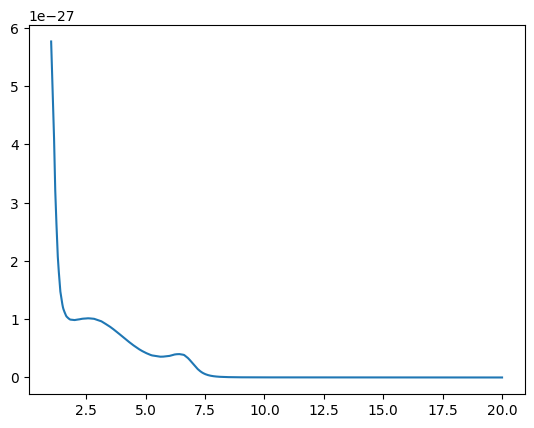

In [166]:
file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= interpolation(file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy())
radius_0 = 20
ii = np.where(radius<=radius_0)[0]
plt.plot(radius[ii],emiss[ii])
radius_civ, emiss_civ = radius[ii],emiss[ii]

Text(0, 0.5, 'PDF')

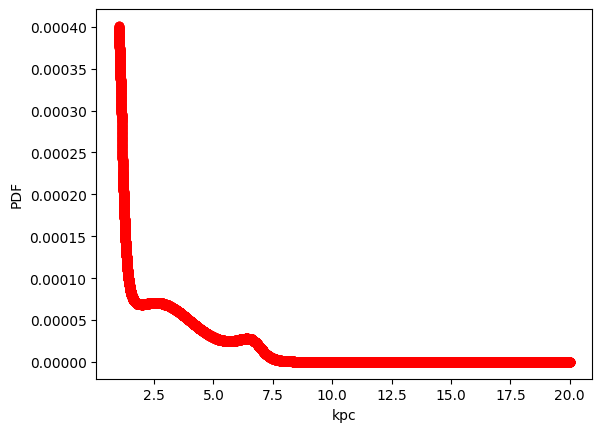

In [167]:
Total_A = np.sum(emiss_civ)
density = emiss_civ/Total_A
plt.plot(radius_civ,density,'ro')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((radius_civ,density)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)
plt.xlabel('kpc')
plt.ylabel('PDF')

/tmp/ipykernel_4877/2144347121.py:27: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()
/home/jin/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


10428


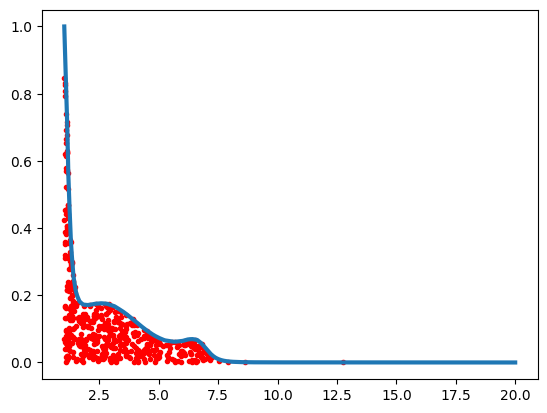

In [168]:
x = []
y= []
reject_x= []
reject_y =[]
p_max = density.max()
n , loop = 0 , 0 

# print(density[70]/p_max)

# np.random.seed(0)
while (n<500 and loop < 1e7):
    loop +=1 
    x1,x2 = np.random.random(2)
    x0 = x1*20
    px = find_y(x0,radius_civ,density)
    if (x2 <= px/p_max):
        n+=1
        x.append(x0)
        y.append(x2)
    else:
        reject_x.append(x0)
        reject_y.append(x2)
print(loop)
plt.plot(x,y,'r.')
# plt.plot(reject_x,reject_y,'b.')
plt.plot(radius_civ,density/p_max,lw=3)

(array([284., 128.,  29.,  15.,  11.,   9.,   6.,   9.,   4.,   5.]),
 array([1.04472280e-04, 8.48109910e-02, 1.69517510e-01, 2.54224028e-01,
        3.38930547e-01, 4.23637066e-01, 5.08343585e-01, 5.93050103e-01,
        6.77756622e-01, 7.62463141e-01, 8.47169660e-01]),
 <BarContainer object of 10 artists>)

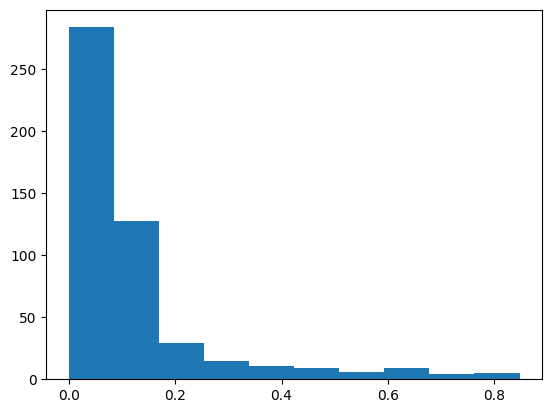

In [187]:
plt.hist(y)

In [128]:
file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= interpolation(file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy())

radius_max = 100

ii = np.where(radius<=radius_max )[0]
# plt.plot(radius[ii],emiss[ii])
radius_civ, emiss_civ = radius[ii],emiss[ii]

Total_A = np.sum(emiss_civ)
density = emiss_civ/Total_A
# plt.plot(radius_civ,density,'ro')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((radius_civ,density)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)

/tmp/ipykernel_4877/2144347121.py:27: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()
/home/jin/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


118664


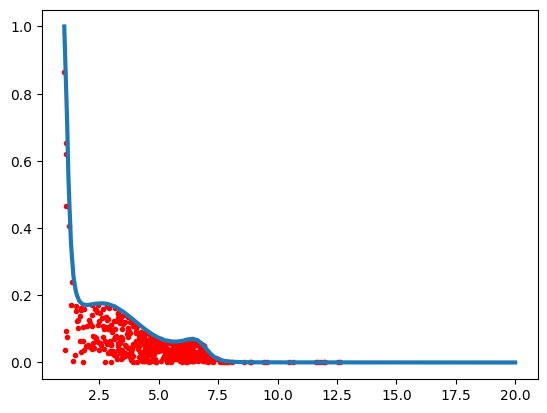

In [180]:
file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= interpolation(file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy())

radius_max = 20

ii = np.where(radius<=radius_max )[0]
# plt.plot(radius[ii],emiss[ii])
radius_civ, emiss_civ = radius[ii],emiss[ii]

Total_A = np.sum(emiss_civ)
density = emiss_civ/Total_A
# plt.plot(radius_civ,density,'ro')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((radius_civ,density)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)
# x= []
# y= []
# z= []

r = []
probility= []
find_number_den = []
reject_r= []
reject_probility=[]
p_max = density.max()
n , loop = 0 , 0 

# print(density[70]/p_max)
r_hist=[]
rr_test=[]
# np.random.seed(0)
while (n<500 and loop < 1e6):

    # r2 = np.random.uniform(0,1)

    r2,x1,y1,z1= np.random.uniform(-1,1,4)
    rr = np.random.uniform(0,1)
    rr_test.append(rr)
    # y1 = np.random.uniform(-1,1)
    # z1= np.random.uniform(-1,1)

    x0 = x1*radius_max
    y0 = y1*radius_max
    z0 = z1*radius_max

    r0 = np.sqrt(x0**2+y0**2+z0**2)
    r_hist.append(r0)
    if r0 <= radius_max:
        loop +=1 
        px = find_y(r0,radius_civ,density)
        if (abs(r2) <= px/p_max):
            n+=1
            r.append(r0)
            probility.append(abs(r2))
            yy = find_y(r0,radius_civ,emiss_civ)
            find_number_den.append(yy)

        else:
            reject_r.append(r0)
            reject_probility.append(r2)
print(loop)
plt.plot(r,probility,'r.')
# plt.plot(reject_x,reject_y,'b.')
plt.plot(radius_civ,density/p_max,lw=3)


/tmp/ipykernel_4877/2144347121.py:27: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()
/home/jin/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


10617


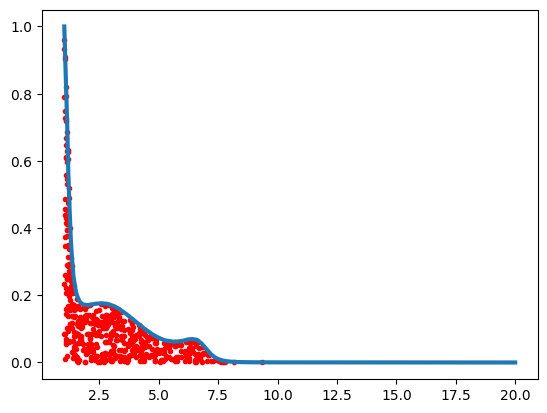

In [ ]:
file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= interpolation(file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy())

radius_max = 20

ii = np.where(radius<=radius_max )[0]
# plt.plot(radius[ii],emiss[ii])
radius_civ, emiss_civ = radius[ii],emiss[ii]

Total_A = np.sum(emiss_civ)
density = emiss_civ/Total_A
# plt.plot(radius_civ,density,'ro')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((radius_civ,density)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)

radius_rand = []
prob= []
find_number_den=[]
x = []
y = []
z = []
reject_radius= []
reject_prob =[]
p_max = density.max()
n , loop = 0 , 0 
while (n<500 and loop < 1e7):
    loop +=1 
    r1,r2 = np.random.random(2)
    r0 = r1*radius_max
    px = find_y(r0,radius_civ,density)
    if (r2 <= px/p_max):
        n+=1
        radius_rand.append(r0)
        prob.append(r2)
        yy = find_y(r0,radius_civ,emiss_civ)
        find_number_den.append(yy)
        theta = np.random.uniform(0, 2 * np.pi)
        phi = np.arccos(np.random.uniform(-1, 1))
        x_i = r0 * np.sin(phi) * np.cos(theta)
        y_i = r0 * np.sin(phi) * np.sin(theta)
        z_i = r0 * np.cos(phi)
        x.append(x_i)
        y.append(y_i)
        z.append(z_i)
    else:
        reject_radius.append(x0)
        reject_prob.append(r2)
print(loop)
plt.plot(radius_rand,prob,'r.')
# # plt.plot(reject_x,reject_y,'b.')
plt.plot(radius_civ,density/p_max,lw=3)

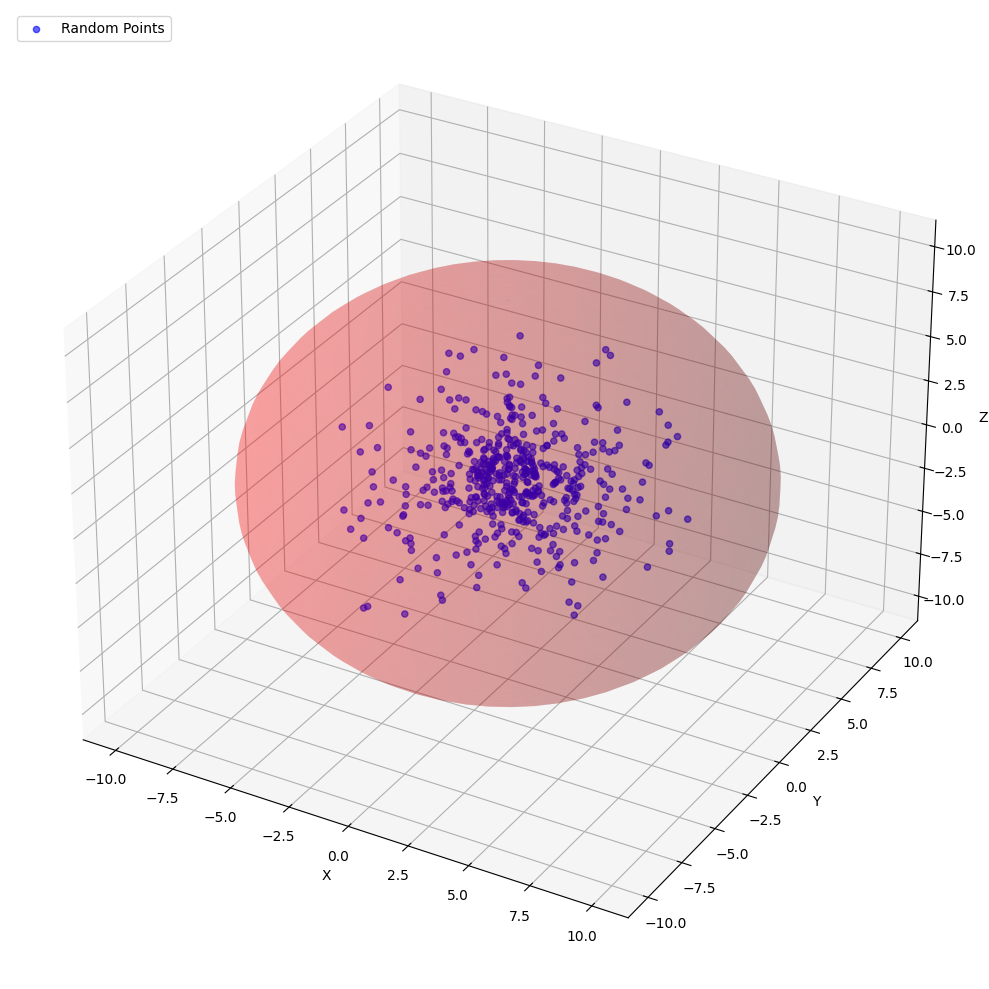

In [ ]:
# x, y, z 리스트를 NumPy 배열로 변환
x_array = np.array(x)
y_array = np.array(y)
z_array = np.array(z)

from mpl_toolkits.mplot3d import Axes3D

radius = 10
phi = np.linspace(0, np.pi, 50)  # 위도
theta = np.linspace(0, 2 * np.pi, 50)  # 경도
phi, theta = np.meshgrid(phi, theta)

# 구의 표면 좌표

x_sphere = radius * np.sin(phi) * np.cos(theta)
y_sphere = radius * np.sin(phi) * np.sin(theta)
z_sphere = radius * np.cos(phi)

# 3D 플롯
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_array, y_array, z_array, c='b', marker='o', alpha=0.6, label="Random Points")
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.2, edgecolor='none')



# 축 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(loc='upper left')
fig.tight_layout()


In [132]:
px = find_y(19,radius_civ,density)

/tmp/ipykernel_4877/2144347121.py:27: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()


In [133]:
x1,x2 = np.random.uniform(-1,1,2)
print(x1,x2)

0.12074978361361732 -0.15928220809989213
